<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/SinglePhase_RL_varyingPowerFactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Single Phase RL Load with Varying Power Factor</h1></b>

Dr. Bingsen Wang

6/24/2023
</center>

#Voltage and Current of RL Load

The relationship between the voltage $v_L,v_R$ across the indcutance and resistance and the current $i_L$ through the inductance with $v_L$ and $i_L$ following the **passive sign convention** can be described by
$$\begin{align}
v_L &= L\frac{di_L}{dt} \tag{1}\\
v_R &= Ri_L\tag{2}
\end{align} $$

The source voltage $v_s$ is
$$ v_s = v_L+v_R\tag{3}$$

#Instantaneous Power

The instantaneous power $p_s(t)$ drawn from the source is
$$p_s(t)=v_si_L \tag{4}$$

Substituting (1) and (2) in (4) yields
$$p_s(t) = {L\over 2}\frac{di_L^2}{dt} + i_L^2 R\tag{5}$$



#Phasor

Let the current phasor $\hat I_L$ be
$$\hat I_L =  I_Le^{j\theta_I}\tag{6}$$

The the voltage phasors are
$$\begin{align}
\hat V_L &= j\omega L \hat I_L\\
\hat V_R &= R \hat I_L\\
\hat V_s &= \hat V_L + \hat V_R
\end{align}\tag{7}$$


#Complex Power

The complex power $S_s$ delivered to the RL load is
$$S_s = \hat V_s \hat I_L^*\tag{8}$$

Substituting (6) and (7) in (8) yields
$$S_s = R|\hat I_L|^2 +j\omega L |\hat I_L|^2 = P_s + jQ_s\tag{9}$$
where $P_s$ and $Q_s$ are the real and reactive powers supplied by the source, respectively.

#Python Code


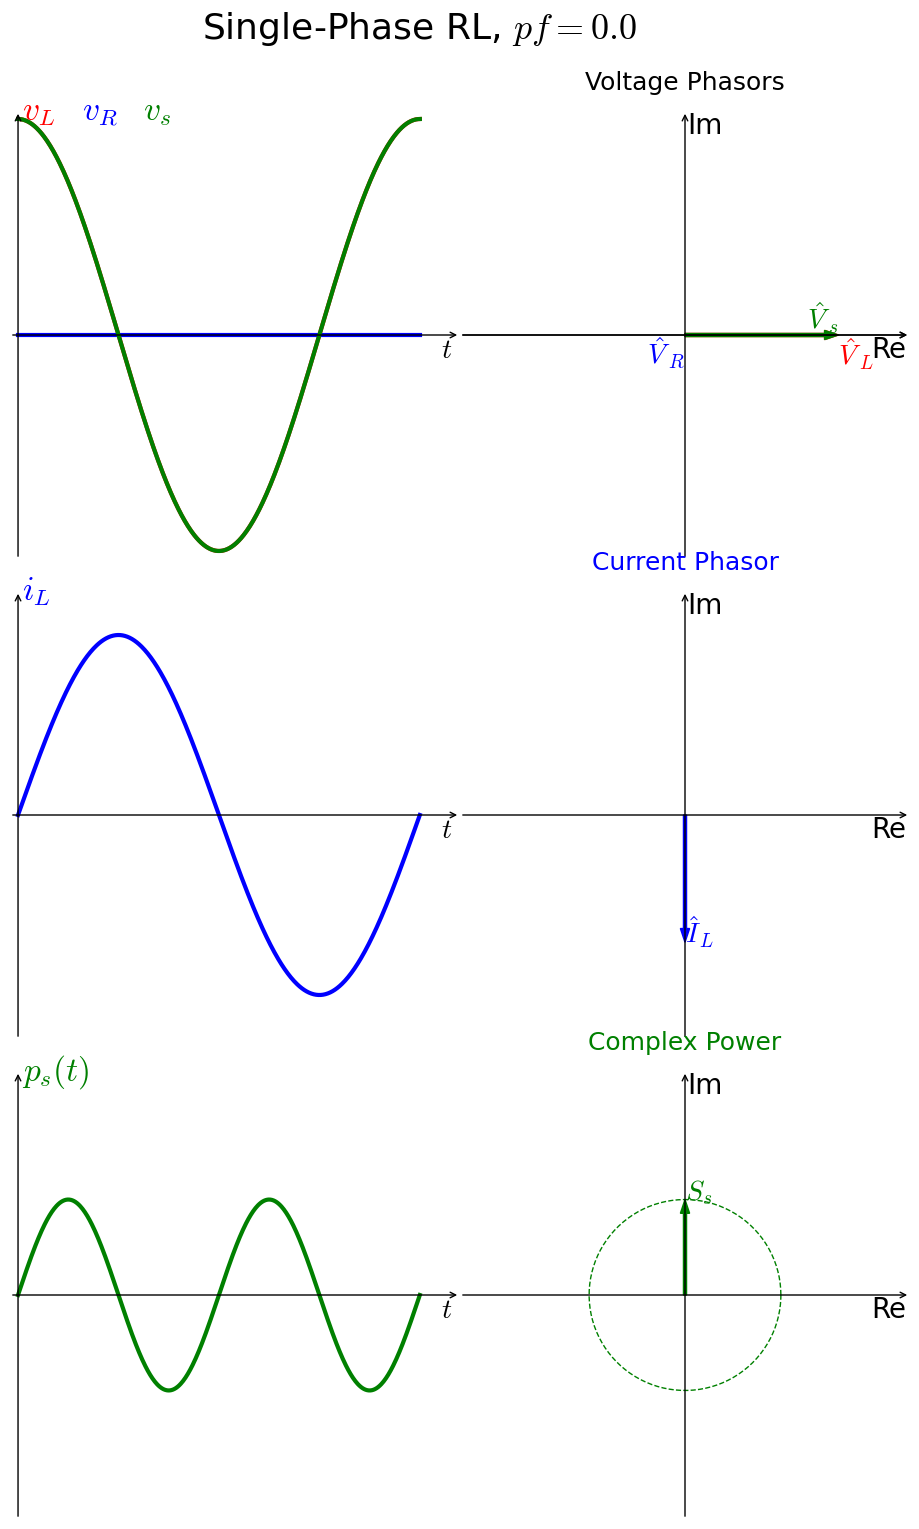

In [13]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,sqrt
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
Nf = 360
t=linspace(0,1,512)
pf = linspace(0,1,Nf) #power factor
theta=linspace(0,2*pi,200)
Z=1.2
Vs = 0.75  # vs rms
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[0,.6, .5, .28],[-.02,1.1],[-1.1,1.1]], #v_L,v_R,v_s
            [[0,.3, .5, .28],[-.02,1.1],[-1.1,1.1]], #i_L
            [[0,0, .5, .28],[-.02,1.1],[-1.1,1.1]], #p(t)
            [[0.5,.6, .5, .28],[-1.1,1.1],[-1.1,1.1]], #phasor V_L,V_R,V_s
            [[0.5,.3, .5, .28],[-1.1,1.1],[-1.1,1.1]], #phasor I_L
            [[0.5,0, .5, .28],[-1.1,1.1],[-1.1,1.1]], # S
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[r'$v_L$','$v_R$','$v_s$', '$t$'],
        [r'$i_L$', '$t$'],
        [r'$p_s(t)$', '$t$'],
        ['Im', 'Re'],
        ['Im', 'Re'],
        ['Im', 'Re'],
        ] #variables for yx axes of each subplot
clst=[['r','b','g'],'b','g',['r','b','g'],'b','g'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
tx_lst=[] # for phasor labels and complex power
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right') #x-axis label
  if k<3:
    for kk in range(len(ax_lbl[k])-1):
      lines.append(ax.plot([], [], color=clst[k][kk], lw=3)[0]) #lines to plot
      ax.text(0.01+kk*0.15,ym,ax_lbl[k][kk],size=24,va='center',color=clst[k][kk]) #y label
  else:
    if k==3:
      for kk in range(3):
        lines.append(ax.arrow([], [],[],[],width=0.015,color=clst[k][kk],
                              length_includes_head=True)) #lines to plot
        tx_lst.append(ax.text(0,0,'',color=clst[k][kk],size=20))
    else:
      lines.append(ax.arrow([], [],[],[],width=0.015,color=clst[k],
                            length_includes_head=True)) #lines to plot
      tx_lst.append(ax.text(0,0,'',color=clst[k],size=20))
    ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top') #y label

tx_title=ax_lst[0].text(1,ax_frame[0][2][1]+0.5,'',va='top',ha='center',size=26)
ax_lst[3].text(0,ax_frame[3][2][1]+.2,r'Voltage Phasors',
               va='top',ha='center',size=18)
tx_test=ax_lst[3].annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
ax_lst[4].text(0,ax_frame[4][2][1]+.2,r'Current Phasor',
               color=clst[4],va='top',ha='center',size=18)
ax_lst[5].text(0,ax_frame[5][2][1]+.2,r'Complex Power',
               color=clst[5],va='top',ha='center',size=18)
# animation function. This is called sequentially
def animate(i):
  tx_title.set_text('Single-Phase RL, $pf='+str(round(pf[i],2))+'$')
  R = pf[i]*Z
  X = sqrt(Z**2-R**2)
  Vs_phasor = Vs #source voltage phasor in rms
  IL_phasor = Vs_phasor/(R+1j*X)
  VL_phasor = 1j*X*IL_phasor #phasor voltage VL in rms
  VR_phasor = IL_phasor*R
  iL = abs(IL_phasor)*sqrt(2)*cos(2*pi*t+angle(IL_phasor)) #instantaneous current
  vL = abs(VL_phasor)*sqrt(2)*cos(2*pi*t+angle(VL_phasor)) #instantaneous voltage v_L
  vR = abs(VR_phasor)*sqrt(2)*cos(2*pi*t+angle(VR_phasor)) #instantaneous voltage v_R
  vs = abs(Vs_phasor)*sqrt(2)*cos(2*pi*t+angle(Vs_phasor)) #instantaneous source voltage

  pt = vs*iL #instantaneous power
  Ss = Vs_phasor*np.conj(IL_phasor)
  lines[0].set_data(t,vL)
  lines[1].set_data(t,vR)
  lines[2].set_data(t,vs)
  lines[3].set_data(t,iL)
  lines[4].set_data(t,pt)
  lines[5].set_data(x=VR_phasor.real,y=VR_phasor.imag,dx=VL_phasor.real,dy=VL_phasor.imag) #VL phasor
  lines[6].set_data(x=0,y=0,dx=VR_phasor.real,dy=VR_phasor.imag) #VR phasor
  lines[7].set_data(x=0,y=0,dx=Vs_phasor.real,dy=Vs_phasor.imag) #Vs phasor
  lines[8].set_data(x=0,y=0,dx=IL_phasor.real,dy=IL_phasor.imag) #IL phasor
  lines[9].set_data(x=0,y=0,dx=Ss.real,dy=Ss.imag) #Complex power
  tx_lst[0].set_position([Vs_phasor.real,Vs_phasor.imag])
  tx_lst[0].set_text(r'$\hat V_L$')
  tx_lst[0].set_va('top')
  tx_lst[0].set_ha('left')
  tx_lst[1].set_position([VR_phasor.real,VR_phasor.imag])
  tx_lst[1].set_text(r'$\hat V_R$')
  tx_lst[1].set_ha('right')
  tx_lst[1].set_va('top')
  tx_lst[2].set_position([Vs_phasor.real,Vs_phasor.imag])
  tx_lst[2].set_text(r'$\hat V_s$')
  tx_lst[2].set_ha('right')
  tx_lst[2].set_va('bottom')
  tx_lst[3].set_position([IL_phasor.real,IL_phasor.imag])
  tx_lst[3].set_text(r'$\hat I_L$')
  tx_lst[4].set_position([Ss.real,Ss.imag])
  tx_lst[4].set_text(r'$S_s$')
  return

ax_lst[5].plot(Vs**2/Z*cos(theta),Vs**2/Z*sin(theta),'--g',lw=1)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "SinglePhase_RL_varyingPF.mp4"
writervideo = animation.FFMpegWriter(fps=36)
anim.save(fn, writer=writervideo,dpi = 120)

